In [606]:
import overpy

In [607]:
api = overpy.Overpass()

In [608]:
result = api.query("[out:json];node(50.745,7.17,50.75,7.18);out;")

In [610]:
query = '''(
way[highway~"^(residential)$"]
  (43.23407,-79.92975,43.24457,-79.9156);
);
out body;
>;
out skel qt;'''

In [416]:
query = '''way[highway~"^(residential)$"] (43.23407,-79.92975,43.2410,-79.92705);

out body;
>;
out skel qt;'''

In [611]:
import pprint
pprint.pprint(query)

('(\n'
 'way[highway~"^(residential)$"]\n'
 '  (43.23407,-79.92975,43.24457,-79.9156);\n'
 ');\n'
 'out body;\n'
 '>;\n'
 'out skel qt;')


In [612]:
result = api.query(query)

In [613]:
result.nodes

[<overpy.Node id=210846596 lat=43.2365335 lon=-79.9281204>,
 <overpy.Node id=210846597 lat=43.2366042 lon=-79.9281447>,
 <overpy.Node id=210846598 lat=43.2366686 lon=-79.9281239>,
 <overpy.Node id=210846600 lat=43.2367116 lon=-79.9280736>,
 <overpy.Node id=4404898296 lat=43.2353157 lon=-79.9277386>,
 <overpy.Node id=267992115 lat=43.2390706 lon=-79.9283558>,
 <overpy.Node id=267992133 lat=43.2408440 lon=-79.9278227>,
 <overpy.Node id=267992134 lat=43.2409740 lon=-79.9278655>,
 <overpy.Node id=267992136 lat=43.2412549 lon=-79.9278619>,
 <overpy.Node id=267992280 lat=43.2389875 lon=-79.9288384>,
 <overpy.Node id=267992407 lat=43.2401522 lon=-79.9280797>,
 <overpy.Node id=267992408 lat=43.2401496 lon=-79.9282297>,
 <overpy.Node id=267992409 lat=43.2401626 lon=-79.9283618>,
 <overpy.Node id=267992410 lat=43.2402614 lon=-79.9286367>,
 <overpy.Node id=267992411 lat=43.2403421 lon=-79.9286938>,
 <overpy.Node id=267992412 lat=43.2408882 lon=-79.9288794>,
 <overpy.Node id=267992413 lat=43.24097

In [614]:
node_map = {node.id: node for node in result.nodes}

In [715]:
excluded_ways = {35293308,
                 441472728,
                 441472731,
                 465328794
                }

In [716]:
roads = {}

In [717]:
for way in result.ways:
    tags = way.tags
    if 'name' in way.tags and way.id not in excluded_ways:
        roads[way.id] = way

In [718]:
result.ways[0].id

20002970

In [719]:
for i, way in roads.items():
    print(i, way.tags.get('name'))

20002970 Magnolia Drive
20003056 Lavina Crescent
20003119 Diamond Court
20003124 Vanessa Court
20003137 Minstrel Court
20003141 Krafty Court
20003145 Rialto Court
20879447 Rice Avenue
24656048 Aterno Drive
24656050 San Remo Drive
24656066 Tivoli Drive
24656088 San Francisco Avenue
24656092 Goulding Avenue
27726852 Sanatorium Road
27828775 San Pedro Drive
27828784 Malabar Court
27828785 San Fernando Drive
27828788 San Marco Street
27828792 San Antonio Drive
27828795 Karen Crescent
27828805 Santa Fe Court
27828807 Sancrest Court
27828808 Argo Street
27828813 San Diego Court
27828815 San Paulo Drive
27828822 San Greco Drive
27828825 San Marino Crescent
27828833 Hepburn Crescent
27828845 Cordingley Court
27828852 Gem Court
27828854 Jewel Street
27828859 Redfern Avenue
35291715 Southridge Drive
35292066 Southridge Drive
35295016 Southridge Drive
35295864 Cherrygrove Crescent
35296547 Southside Place
35297805 Southridge Drive
35299090 Briarose Place
35299602 Southridge Drive
35299805 Briaros

In [720]:
from haversine import haversine

In [721]:
def compute_road_length(road_nodes):
    total_distance = 0
    for i in range(len(road_nodes) - 1):
        n1 = road_nodes[i]
        n2 = road_nodes[i+1]
        total_distance += haversine((n1.lat, n1.lon), (n2.lat, n2.lon))
    return total_distance

In [722]:
for way_id, way in roads.items():
    print(way_id, way.tags.get('name'), compute_road_length(way.nodes))

20002970 Magnolia Drive 0.3211049250086602
20003056 Lavina Crescent 0.5946457344178688
20003119 Diamond Court 0.17026576596742762
20003124 Vanessa Court 0.05706532283809368
20003137 Minstrel Court 0.09163693622038074
20003141 Krafty Court 0.05331626693880504
20003145 Rialto Court 0.10762279368349825
20879447 Rice Avenue 0.0514686878174431
24656048 Aterno Drive 0.2616090623631208
24656050 San Remo Drive 0.6610521740666603
24656066 Tivoli Drive 0.12454181272336651
24656088 San Francisco Avenue 0.9514439720447
24656092 Goulding Avenue 0.38135611464445995
27726852 Sanatorium Road 0.45988362021465257
27828775 San Pedro Drive 0.50910226364246
27828784 Malabar Court 0.02365752829229022
27828785 San Fernando Drive 0.4612048081669728
27828788 San Marco Street 0.08433246332287304
27828792 San Antonio Drive 0.49092588245518753
27828795 Karen Crescent 0.2687134615884836
27828805 Santa Fe Court 0.03718040695516521
27828807 Sancrest Court 0.03967294783955418
27828808 Argo Street 0.08932477123034811


In [723]:
from collections import defaultdict

In [724]:
node_to_ways

defaultdict(list,
            {210842202: [20002970, 465327314],
             210842204: [20002970],
             210848518: [20002970, 20003119, 20003124],
             210849649: [20002970, 20003137],
             210842205: [20002970, 20003056],
             1948026282: [20002970],
             1948026281: [20002970, 511321895],
             413618913: [20003056],
             413635817: [20003056],
             210846587: [20003056],
             210846591: [20003056],
             210846593: [20003056],
             4404898298: [20003056],
             210846595: [20003056],
             210849952: [20003056, 20003141],
             4404898296: [20003056],
             210846596: [20003056],
             210846597: [20003056],
             210846598: [20003056],
             210846600: [20003056],
             267992111: [20003056, 24656048],
             210850247: [20003056, 20003145],
             267992116: [20003056, 24656050, 465327314],
             210848520: [20003119],
 

In [725]:
node_to_ways = defaultdict(list)
for node, ways in node_to_ways.items():
    print(node, len(ways))

In [726]:
for way_id, way in roads.items():
    for node in way.nodes:
        node_to_ways[node.id].append(way_id)
        
intersections = {k for k, v in node_to_ways.items() if len(v) > 1}

In [727]:
[n for n in roads[20003056].nodes if n.id in intersections]

[<overpy.Node id=210842205 lat=43.2345624 lon=-79.9247622>,
 <overpy.Node id=210849952 lat=43.2352042 lon=-79.9277037>,
 <overpy.Node id=267992111 lat=43.2367708 lon=-79.9276748>,
 <overpy.Node id=210850247 lat=43.2368515 lon=-79.9271865>,
 <overpy.Node id=267992116 lat=43.2369424 lon=-79.9266344>]

In [728]:
road_segments = dict()


In [729]:
dead_ends = dict()
for way_id, way in roads.items():
    #print('way_id', way_id)
    first_node_id = way.nodes[0].id
    last_node_id = way.nodes[-1].id
    if first_node_id not in intersections:
        dead_ends[first_node_id] = way
    if last_node_id not in intersections:
        dead_ends[last_node_id] = way
        
    current_segment = []
    i = 0
    for node in way.nodes:
        #print('node', node)
        if node.id in dead_ends or node.id in intersections:
            if len(current_segment):
                current_segment.append(node)
                road_segments[(way_id, i)] = current_segment
                current_segment = [node]
                i += 1
            else:
                current_segment.append(node)
        else:
            current_segment.append(node)


In [807]:
node_pair_to_roadsegment = {}

vals = []
for key, road_segment in road_segments.items():
    sorted_pair = tuple(sorted([road_segment[0].id, road_segment[-1].id]))
    node_pair_to_roadsegment[sorted_pair] = road_segment                 
    vals.append({
        'trail': '_'.join([str(s) for s in key]),
        'node1': road_segment[0].id,
        'node2': road_segment[-1].id,
        'lat1': road_segment[0].lat,
        'lon1': road_segment[0].lon,
        'lat2': road_segment[-1].lat,
        'lon2': road_segment[-1].lon,
        'distance':compute_road_length(road_segment)
    })
import pandas as pd
df = pd.DataFrame(vals)

In [808]:
node_pair_to_roadsegment

{(210842202,
  210848518): [<overpy.Node id=210842202 lat=43.2370325 lon=-79.9255045>, <overpy.Node id=210842204 lat=43.2369762 lon=-79.9254444>, <overpy.Node id=210848518 lat=43.2362505 lon=-79.9252474>],
 (210848518,
  210849649): [<overpy.Node id=210848518 lat=43.2362505 lon=-79.9252474>, <overpy.Node id=210849649 lat=43.2353941 lon=-79.9249781>],
 (210842205,
  210849649): [<overpy.Node id=210849649 lat=43.2353941 lon=-79.9249781>, <overpy.Node id=210842205 lat=43.2345624 lon=-79.9247622>],
 (210842205,
  1948026281): [<overpy.Node id=210842205 lat=43.2345624 lon=-79.9247622>, <overpy.Node id=1948026282 lat=43.2344381 lon=-79.9247188>, <overpy.Node id=1948026281 lat=43.2342216 lon=-79.9246432>],
 (210842205,
  210849952): [<overpy.Node id=210842205 lat=43.2345624 lon=-79.9247622>, <overpy.Node id=413618913 lat=43.2345022 lon=-79.9262789>, <overpy.Node id=413635817 lat=43.2344947 lon=-79.9264392>, <overpy.Node id=210846587 lat=43.2344698 lon=-79.9272183>, <overpy.Node id=210846591 l

In [804]:
import networkx as nx
G = nx.Graph()
for i, row in df.iterrows():
    G.add_edge(row['node1'], row['node2'], attr=row['trail'])
from networkx.algorithms.shortest_paths.generic import shortest_path
to_remove = []
for n in G.nodes:
    try:
        x = shortest_path(G, n, 210842205)
    except Exception:
        to_remove.append(n)

In [733]:
df = df.loc[~df['node1'].isin(to_remove)].loc[~df['node2'].isin(to_remove)]

In [735]:
EDGELIST = r'C:\tmp\mountview_df.csv'
for col in ['node1', 'node2', 'trail']:
    df[col] = df[col].astype('str')
#df['distance'] = (df['distance'] * 1000).astype(int)
df['node1'] = df['node1'].apply(lambda x: 'x_{}'.format(x))
df['node2'] = df['node2'].apply(lambda x: 'x_{}'.format(x))
df['trail'] = df['trail'].apply(lambda x: 'x_{}'.format(x))


df[['node1', 'node2', 'trail', 'distance']].to_csv(EDGELIST, index=False)

In [737]:
import matplotlib.pyplot as plt

In [738]:
from postman_problems.solver import cpp

In [739]:
postman_problems.__file__

'c:\\github_code\\postman_problems\\postman_problems\\__init__.py'

In [740]:
circuit, graph = cpp(edgelist_filename=EDGELIST, start_node='x_210842205')

In [741]:
for x in circuit:
    print(x[0], x[1])

x_210842205 x_1948026281
x_1948026281 x_1947946457
x_1947946457 x_1948026281
x_1948026281 x_210842205
x_210842205 x_210849952
x_210849952 x_210849950
x_210849950 x_210849952
x_210849952 x_267992111
x_267992111 x_210850247
x_210850247 x_210850245
x_210850245 x_210850247
x_210850247 x_267992116
x_267992116 x_305547465
x_305547465 x_305547472
x_305547472 x_305547477
x_305547477 x_305547397
x_305547397 x_267992460
x_267992460 x_305547571
x_305547571 x_267992460
x_267992460 x_305547397
x_305547397 x_305547401
x_305547401 x_305547429
x_305547429 x_267992459
x_267992459 x_305547423
x_305547423 x_267992459
x_267992459 x_267992455
x_267992455 x_305547613
x_305547613 x_413650228
x_413650228 x_413637731
x_413637731 x_413650228
x_413650228 x_305547586
x_305547586 x_413650228
x_413650228 x_305547613
x_305547613 x_305547585
x_305547585 x_305547584
x_305547584 x_305547585
x_305547585 x_305547586
x_305547586 x_305547389
x_305547389 x_90412411
x_90412411 x_305547389
x_305547389 x_1164614506
x_116461450

In [761]:
circuit_node_ids = [int(x[0][2:]) for x in circuit]

In [762]:
circuit_vals = []
circuit_nodes = []
for node_id in circuit_node_ids:
    node = node_map[node_id]
    circuit_nodes.append(node)
    circuit_vals.append({'lat': node.lat,
                        'lon': node.lon})
    print(node.lat)
    
circuit_df = pd.DataFrame(circuit_vals)

43.2345624
43.2342216
43.2336618
43.2342216
43.2345624
43.2352042
43.2352124
43.2352042
43.2367708
43.2368515
43.2359132
43.2368515
43.2369424
43.2388644
43.2407919
43.2419071
43.2424935
43.2422640
43.2419288
43.2422640
43.2424935
43.2425149
43.2432677
43.2429267
43.2428167
43.2429267
43.2437302
43.2438870
43.2431574
43.2429901
43.2431574
43.2433927
43.2431574
43.2438870
43.2442357
43.2446409
43.2442357
43.2433927
43.2426862
43.2431040
43.2426862
43.2425867
43.2422573
43.2425867
43.2421941
43.2418421
43.2421941
43.2422640
43.2429267
43.2437302
43.2445773
43.2455038
43.2445773
43.2444161
43.2440923
43.2444161
43.2442828
43.2439681
43.2442828
43.2440433
43.2429388
43.2440433
43.2432677
43.2425149
43.2425842
43.2427139
43.2425842
43.2419071
43.2407919
43.2406045
43.2427139
43.2429388
43.2402224
43.2406045
43.2402224
43.2392405
43.2388644
43.2392405
43.2390706
43.2389875
43.2390706
43.2367708
43.2368515
43.2369424
43.2370325
43.2362505
43.2361342
43.2362505
43.2355815
43.2362505
43.2353941

In [763]:
circuit_nodes

[<overpy.Node id=210842205 lat=43.2345624 lon=-79.9247622>,
 <overpy.Node id=1948026281 lat=43.2342216 lon=-79.9246432>,
 <overpy.Node id=1947946457 lat=43.2336618 lon=-79.9244478>,
 <overpy.Node id=1948026281 lat=43.2342216 lon=-79.9246432>,
 <overpy.Node id=210842205 lat=43.2345624 lon=-79.9247622>,
 <overpy.Node id=210849952 lat=43.2352042 lon=-79.9277037>,
 <overpy.Node id=210849950 lat=43.2352124 lon=-79.9270457>,
 <overpy.Node id=210849952 lat=43.2352042 lon=-79.9277037>,
 <overpy.Node id=267992111 lat=43.2367708 lon=-79.9276748>,
 <overpy.Node id=210850247 lat=43.2368515 lon=-79.9271865>,
 <overpy.Node id=210850245 lat=43.2359132 lon=-79.9268606>,
 <overpy.Node id=210850247 lat=43.2368515 lon=-79.9271865>,
 <overpy.Node id=267992116 lat=43.2369424 lon=-79.9266344>,
 <overpy.Node id=305547465 lat=43.2388644 lon=-79.9272216>,
 <overpy.Node id=305547472 lat=43.2407919 lon=-79.9266606>,
 <overpy.Node id=305547477 lat=43.2419071 lon=-79.9264829>,
 <overpy.Node id=305547397 lat=43.242

In [764]:
circuit_df.head()

lat          lon
0  43.2345624  -79.9247622
1  43.2342216  -79.9246432
2  43.2336618  -79.9244478
3  43.2342216  -79.9246432
4  43.2345624  -79.9247622

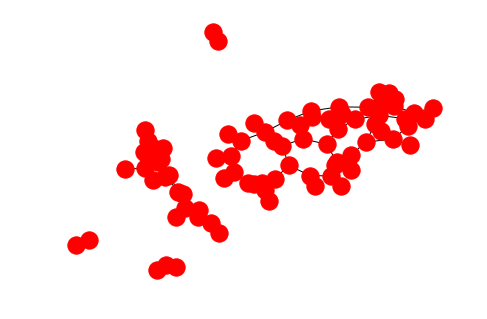

In [765]:
nx.draw(G)

In [766]:
G.nodes

NodeView((210842202, 210848518, 210849649, 210842205, 1948026281, 210849952, 267992111, 210850247, 267992116, 1164614494, 210848840, 210849648, 210849950, 210850245, 224348259, 224343103, 267992115, 305547465, 267992256, 267992353, 305547555, 267992137, 267992280, 267992419, 267992421, 305547532, 305547554, 267992432, 90412890, 267992455, 267992459, 267992460, 60068011, 90412411, 305547389, 1164614506, 1164614496, 305547423, 305547429, 305547401, 305547472, 305547477, 305547402, 305547397, 305547531, 305547553, 305547571, 305547584, 305547585, 305547586, 305547613, 413650228, 305547675, 305547709, 305547673, 305547710, 305547795, 305547819, 305547828, 305547671, 304468652, 413641434, 413658491, 413619907, 413608748, 413645705, 413623768, 413634554, 413666102, 413647841, 413619142, 413640762, 306297239, 413617388, 413637731, 1164614492, 1164614497, 1164614498, 1677848767, 35195052, 1947946457))

In [767]:
import matplotlib.pyplot as plt

In [768]:
import tilemapbase
tilemapbase.start_logging()

In [769]:
tilemapbase.init(create=True)

In [770]:
# Use open street map
t = tilemapbase.tiles.OSM

In [771]:
my_office  = [-79.9255045, 43.2370325]
degree_range = 0.015
extent = tilemapbase.Extent.from_lonlat(my_office[0] - degree_range, my_office[0] + degree_range,
                  my_office[1] - degree_range, my_office[1] + degree_range)
extent = extent.to_aspect(1.0)
extent

Extent((0.27794304305555556,0.3665055936891972)->(0.2780263763888889,0.36658892702253054) projected as normal)

In [772]:
# for col in ['lat1', 'lat2', 'lon1', 'lon2']:
#     df[col] = df[col].astype('float')


longs = circuit_df['lon'].astype('float').to_list()
lats = circuit_df['lat'].astype('float').to_list()
path = [tilemapbase.project(x,y) for x,y in zip(longs, lats)]
x, y = zip(*path)

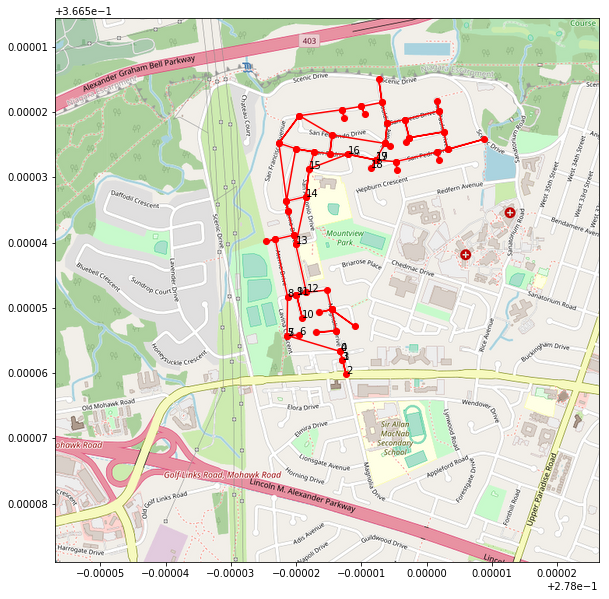

In [773]:
fig, ax = plt.subplots(figsize=(10,10))

plotter = tilemapbase.Plotter(extent, tilemapbase.tiles.OSM, width=600)
plotter.plot(ax)
ax.plot(x, y, "ro-")


for i, (xi, yi) in enumerate(zip(x, y)):
    if i < 20:
        plt.annotate(str(i), (xi, yi))
# for i, row in df.iterrows():
#     ax.plot(longs, lats)


In [774]:
sum([c[3]['distance'] for c in circuit])

9.551761492605728

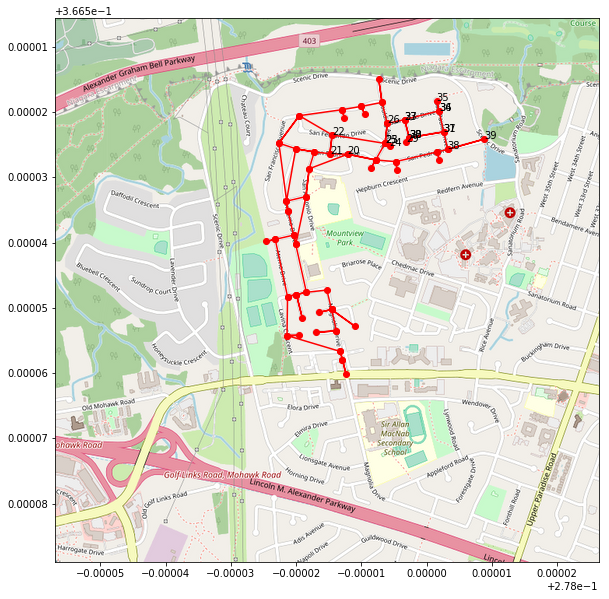

In [775]:
fig, ax = plt.subplots(figsize=(10,10))

plotter = tilemapbase.Plotter(extent, tilemapbase.tiles.OSM, width=600)
plotter.plot(ax)
ax.plot(x, y, "ro-")


for i, (xi, yi) in enumerate(zip(x, y)):
    if i >= 20 and i < 40:
        plt.annotate(str(i), (xi, yi))

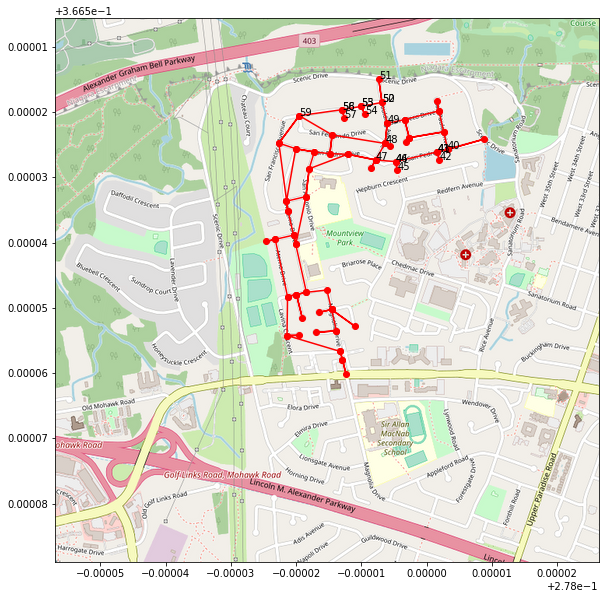

In [776]:
fig, ax = plt.subplots(figsize=(10,10))

plotter = tilemapbase.Plotter(extent, tilemapbase.tiles.OSM, width=600)
plotter.plot(ax)
ax.plot(x, y, "ro-")


for i, (xi, yi) in enumerate(zip(x, y)):
    if i >= 40 and i < 60:
        plt.annotate(str(i), (xi, yi))

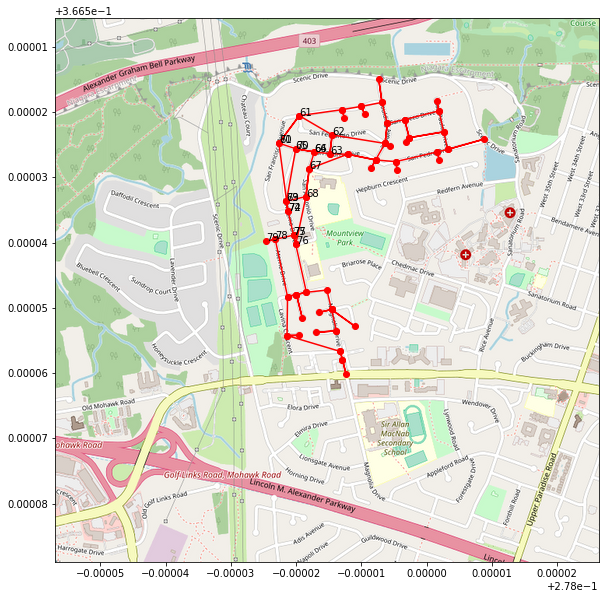

In [777]:
fig, ax = plt.subplots(figsize=(10,10))

plotter = tilemapbase.Plotter(extent, tilemapbase.tiles.OSM, width=600)
plotter.plot(ax)
ax.plot(x, y, "ro-")


for i, (xi, yi) in enumerate(zip(x, y)):
    if i >= 60 and i < 80:
        plt.annotate(str(i), (xi, yi))

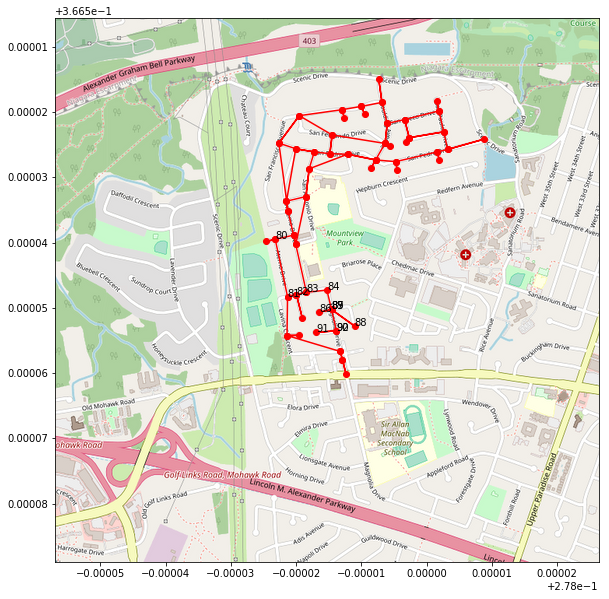

In [778]:
fig, ax = plt.subplots(figsize=(10,10))

plotter = tilemapbase.Plotter(extent, tilemapbase.tiles.OSM, width=600)
plotter.plot(ax)
ax.plot(x, y, "ro-")


for i, (xi, yi) in enumerate(zip(x, y)):
    if i >= 80 and i < 100:
        plt.annotate(str(i), (xi, yi))

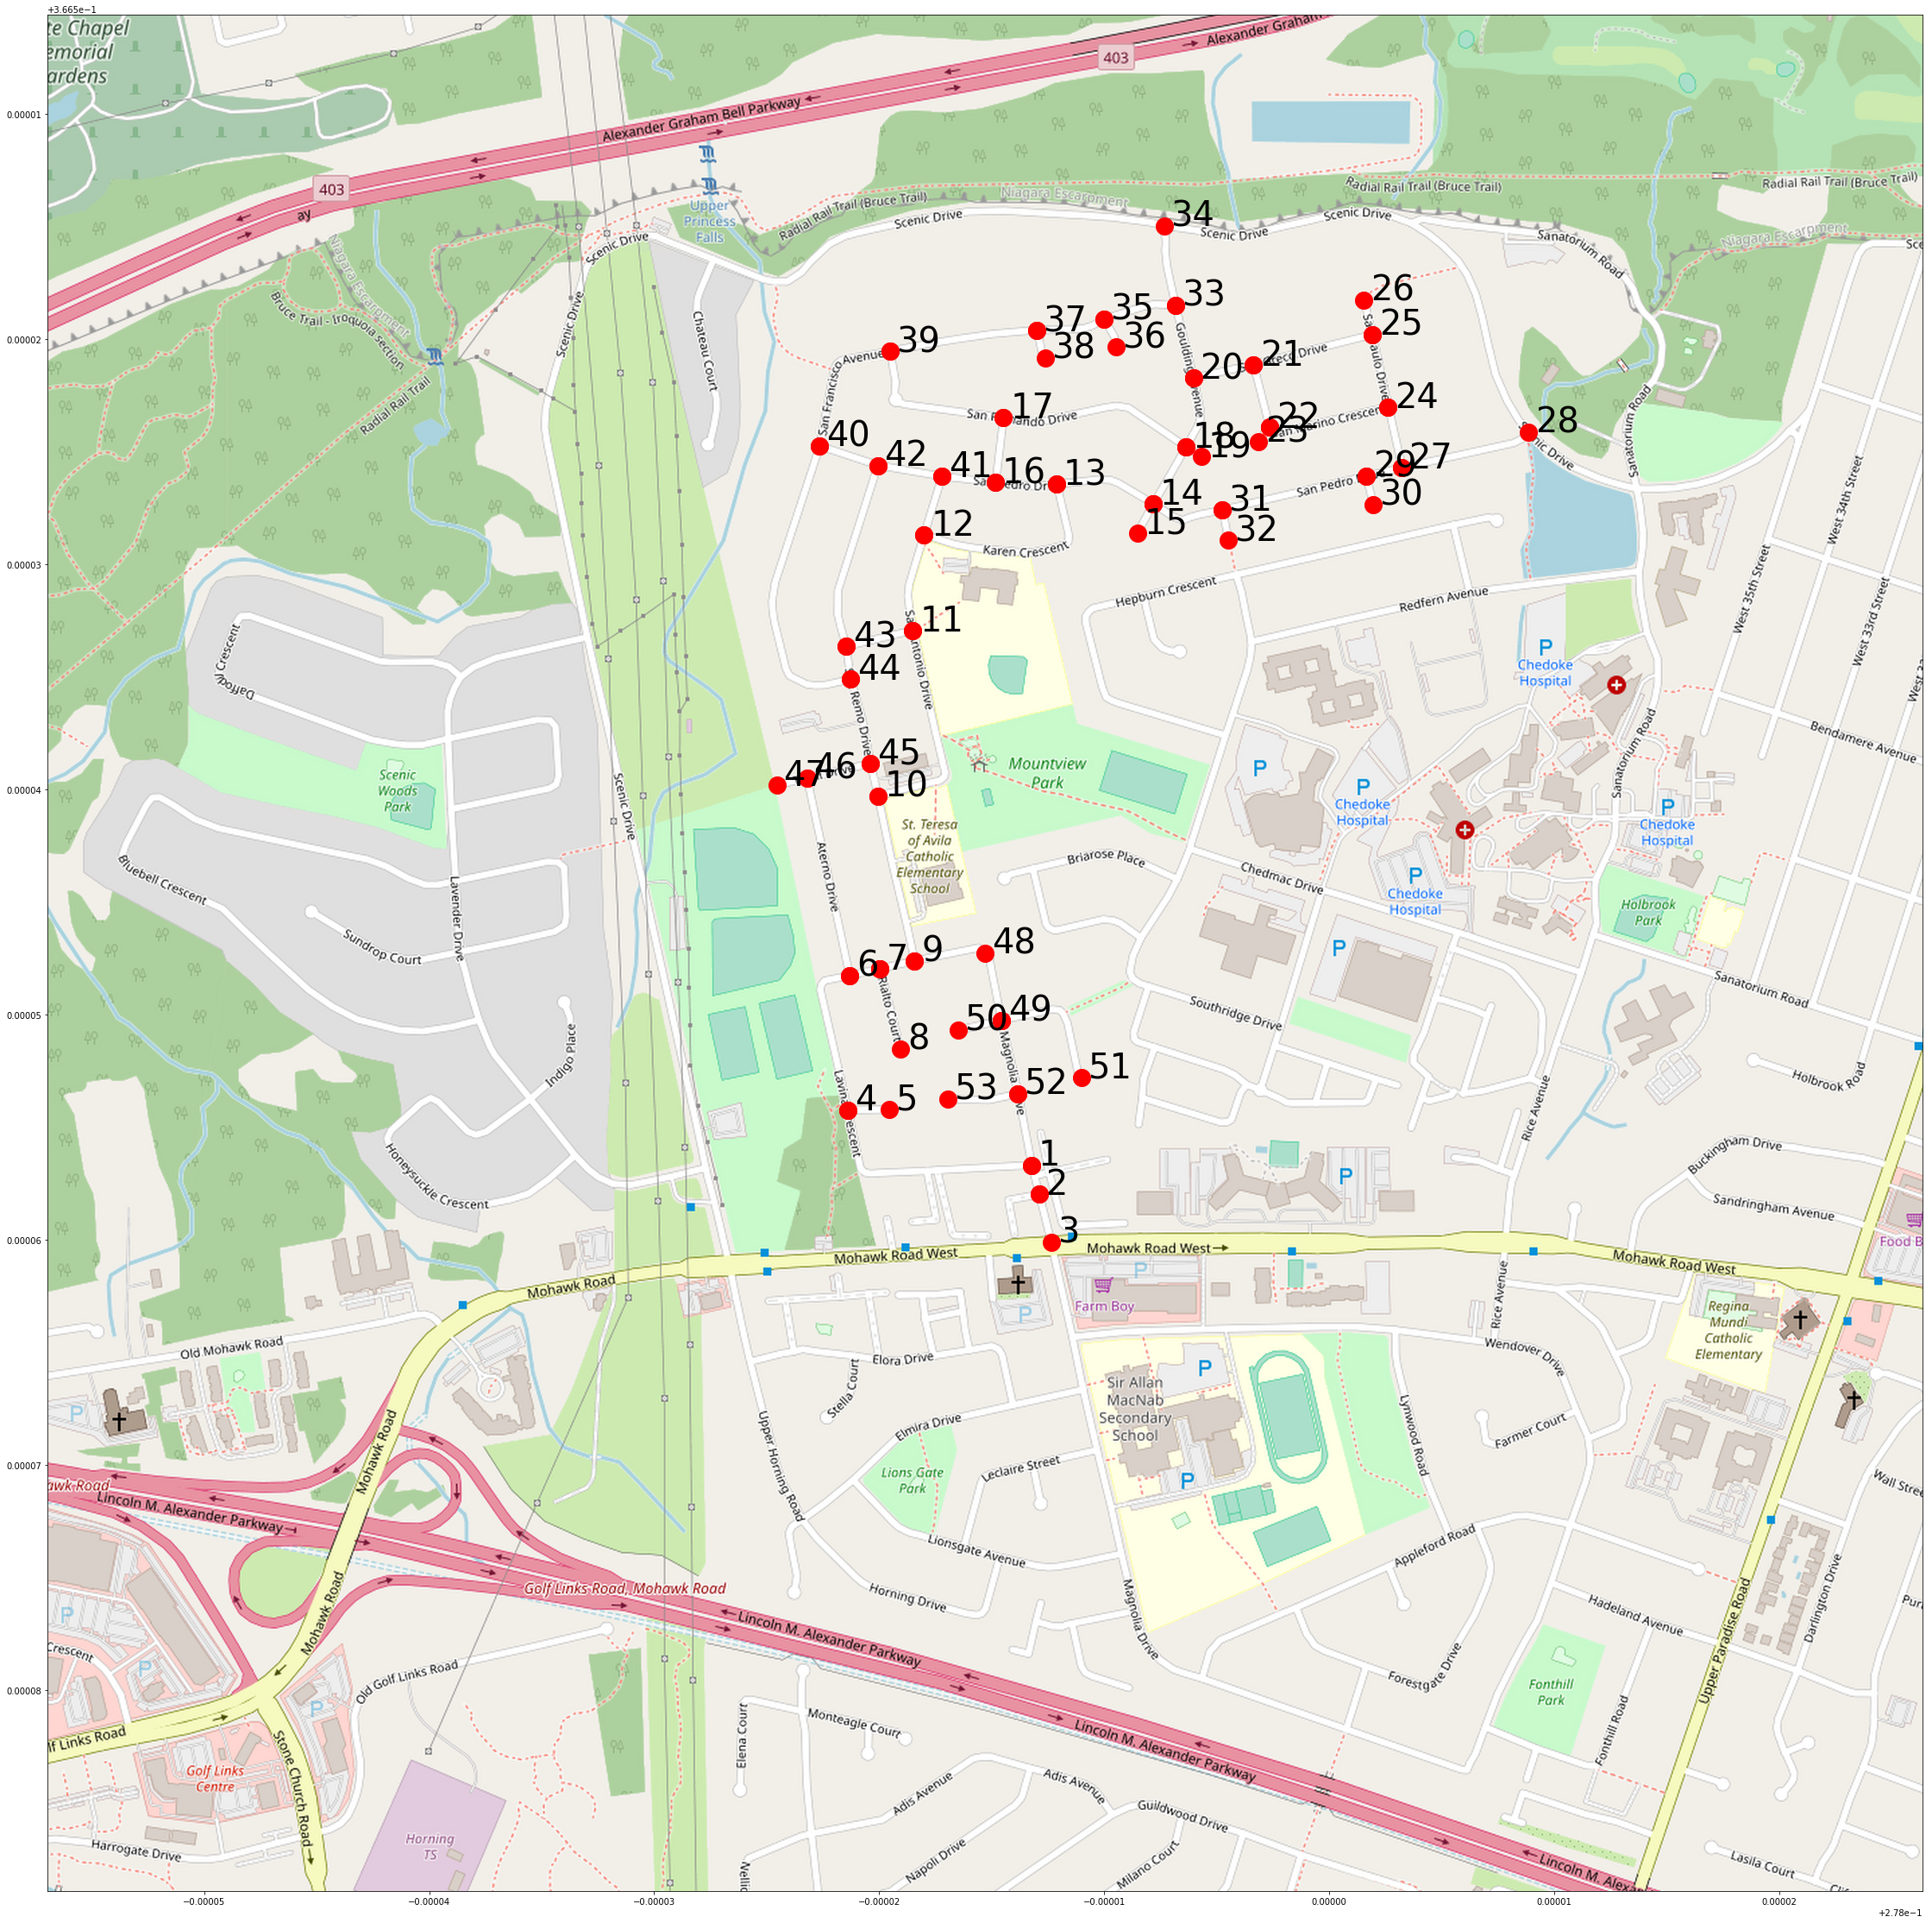

In [779]:
fig, ax = plt.subplots(figsize=(40,40))

plotter = tilemapbase.Plotter(extent, tilemapbase.tiles.OSM, width=1200)
plotter.plot(ax)
ax.plot(x, y, "ro", markersize=20)

i = 1
unique = set()
for xi, yi in zip(x, y):
    if (xi, yi) not in unique:
        unique.add((xi, yi))
        plt.annotate(str(i), (xi+.0000003, yi), size=40)
        i += 1
plt.savefig(r"C:\tmp\test.jpg", format='jpg')

In [780]:
plt.savefig(r"C:\tmp\test.jpg", format='jpg')

<Figure size 432x288 with 0 Axes>

In [781]:
import gpxpy

In [782]:
help(gpxpy)

Help on package gpxpy:

NAME
    gpxpy - # -*- coding: utf-8 -*-

PACKAGE CONTENTS
    geo
    gpx
    gpxfield
    gpxxml
    parser
    utils

FUNCTIONS
    parse(xml_or_file, version=None)
        Parse xml (string) or file object. This is just an wrapper for
        GPXParser.parse() function.
        
        parser may be 'lxml', 'minidom' or None (then it will be automatically
        detected, lxml if possible).
        
        xml_or_file must be the xml to parse or a file-object with the XML.
        
        version may be '1.0', '1.1' or None (then it will be read from the gpx
        xml node if possible, if not then version 1.0 will be used).

VERSION
    1.3.5

FILE
    c:\users\mwongkee\anaconda3\envs\postman\lib\site-packages\gpxpy\__init__.py




In [790]:
dir(gpxpy)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'parse']

In [854]:
header = '''<?xml version="1.0" encoding="UTF-8"?>
<gpx creator="StravaGPX" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.topografix.com/GPX/1/1 http://www.topografix.com/GPX/1/1/gpx.xsd http://www.garmin.com/xmlschemas/GpxExtensions/v3 http://www.garmin.com/xmlschemas/GpxExtensionsv3.xsd http://www.garmin.com/xmlschemas/TrackPointExtension/v1 http://www.garmin.com/xmlschemas/TrackPointExtensionv1.xsd" version="1.1" xmlns="http://www.topografix.com/GPX/1/1" xmlns:gpxtpx="http://www.garmin.com/xmlschemas/TrackPointExtension/v1" xmlns:gpxx="http://www.garmin.com/xmlschemas/GpxExtensions/v3">
 <metadata>
  <time>{time:%Y-%m-%d}T{time:%H:%M:%S}Z</time>
 </metadata>
 <trk>
  <name>20T with Eric in Toronto</name>
  <type>9</type>
  <trkseg>'''

In [855]:
point_template = '''<trkpt lat="{lat}" lon="{lon}">
    <ele>113.0</ele>
    <time>{time:%Y-%m-%d}T{time:%H:%M:%S}Z</time>
    <extensions>
     <gpxtpx:TrackPointExtension>
      <gpxtpx:hr>95</gpxtpx:hr>
      <gpxtpx:cad>57</gpxtpx:cad>
     </gpxtpx:TrackPointExtension>
    </extensions>
   </trkpt>
'''

In [856]:
footer = '''</trkseg>
 </trk>
</gpx>'''

In [868]:
from datetime import timedelta
import datetime as dt
current_time = dt.datetime(2019, 3, 7, 12, 0, 0)

total_nodes = 0
gpx_txt = header.format(time=current_time)
last_node = None
first_node = None
for node1, node2, i, seg_dict in circuit:

    trail = seg_dict['trail']
    _, way_id, num = trail.split('_')
    way_id = int(way_id)
    num = int(num)
    #print(way_id)
    nodes = road_segments[(way_id, num)]
    node1_int = int(node1[2:])
    if nodes[0].id != node1_int:
        nodes = reversed(nodes)
    #print(nodes)
    for node in nodes:
        if first_node == None:
            first_node = node
        if node != last_node:
            if last_node != None:
                length = compute_road_length([last_node, node])
            else:
                length = None
            last_node = node
            
            if total_nodes < 20000:
                print(length)
                if length is None or length > 0:
                    total_nodes += 1
                    gpx_txt += point_template.format(lon=node.lon, lat=node.lat,
                                            time = current_time)
        current_time += timedelta(seconds=5)
gpx_txt += point_template.format(lon=first_node.lon, lat=first_node.lat,
                                        time = current_time)

gpx_txt += footer

with open(r'C:\tmp\mountview.gpx', 'w') as f:
    f.write(gpx_txt)

None
0.01426172722783243
0.02484057958639289
0.054383065150307656
0.009845234838252484
0.009845234838252484
0.054383065150307656
0.02484057958639289
0.01426172722783243
0.12305285466778973
0.013012954797380101
0.0631770714715764
0.008874194855069453
0.008528077409275032
0.004061807675561171
0.003976594135939412
0.07721736940270463
0.037291140271705096
0.016025126667099945
0.016025126667099945
0.037291140271705096
0.012716530454948707
0.13890076056891343
0.008104204904346773
0.007356533007694289
0.006282139027140886
0.032970179157423986
0.04056164701142858
0.10762279368349825
0.10762279368349825
0.045852815870676196
0.051286022144230115
0.08064449132972419
0.08703075599579306
0.07737071248977019
0.004828128551009888
0.00832351974924746
0.0052605227079674105
0.011949345392350747
0.04196919858450885
0.12800439766091018
0.007000767557771897
0.005689296556688914
0.01889395567134605
0.020801527475471548
0.0144545717123527
0.056739091242003506
0.01089567064442683
0.04086003939940429
0.0184635

In [849]:
dt.datetime(2018, 1, 1, 12, 0, 0)

datetime.datetime(2018, 1, 1, 12, 0)